In [1]:
!tree

.
├── blackmarbleapi.ipynb
├── geotif.tif
├── ghana_pop.tif
├── gha_ppp_2020_1km_Aggregated.tif
├── notebook_requirements.txt
├── ppp_GHA_2020_1km_Aggregated.csv
├── road.ipynb
├── road_location.geojson
├── road_location.json
├── roadlocation.json
├── s_05mr24.shp
├── s_05mr24.shp:Zone.Identifier
├── Untitled.ipynb
└── worldpop.ipynb

0 directories, 14 files


In [4]:
!tree ../

../
├── data_exploration
│   ├── blackmarbleapi.ipynb
│   ├── geotif.tif
│   ├── ghana_pop.tif
│   ├── gha_ppp_2020_1km_Aggregated.tif
│   ├── notebook_requirements.txt
│   ├── ppp_GHA_2020_1km_Aggregated.csv
│   ├── road.ipynb
│   ├── road_location.geojson
│   ├── road_location.json
│   ├── roadlocation.json
│   ├── s_05mr24.shp
│   ├── s_05mr24.shp:Zone.Identifier
│   ├── Untitled.ipynb
│   └── worldpop.ipynb
├── illuminating
│   ├── data_preparation
│   │   ├── blackmarble_data.py
│   │   ├── country_ISO.json
│   │   ├── geodata_processing.py
│   │   ├── __init__.py
│   │   └── __pycache__
│   │       ├── blackmarble_data.cpython-310.pyc
│   │       ├── geodata_processing.cpython-310.pyc
│   │       └── __init__.cpython-310.pyc
│   ├── __init__.py
│   ├── interface
│   │   ├── __init__.py
│   │   └── main.py
│   └── __pycache__
│       └── __init__.cpython-310.pyc
├── illuminating_horizons.egg-info
│   ├── dependency_links.txt
│   ├── not-zip-safe
│   ├── PKG-INFO
│   ├── requires.t

In [1]:
from illuminating.data_preparation.geodata_processing import download_gdf
%load_ext autoreload
%autoreload 2

In [4]:
USA_gdf=download_gdf("USA",1)
USA_gdf.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,USA.1_1,USA,UnitedStates,Alabama,AL|Ala.,NA,State,State,NA,US.AL,US-AL,"MULTIPOLYGON (((-88.12060 30.23320, -88.12330 ..."
1,USA.2_1,USA,UnitedStates,Alaska,AK|Alaska,NA,State,State,NA,US.AK,US-AK,"MULTIPOLYGON (((-179.13150 51.20970, -179.1328..."
2,USA.3_1,USA,UnitedStates,Arizona,AZ|Ariz.,NA,State,State,NA,US.AZ,US-AZ,"MULTIPOLYGON (((-110.75620 31.33290, -111.0750..."
3,USA.4_1,USA,UnitedStates,Arkansas,AR|Ark.,NA,State,State,NA,US.AR,US-AR,"MULTIPOLYGON (((-91.90710 33.00800, -92.86190 ..."
4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,"MULTIPOLYGON (((-117.23300 32.77420, -117.2336..."


In [5]:
california_gdf = USA_gdf[USA_gdf.NAME_1== "California"]
california_gdf

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,"MULTIPOLYGON (((-117.23300 32.77420, -117.2336..."


<Axes: >

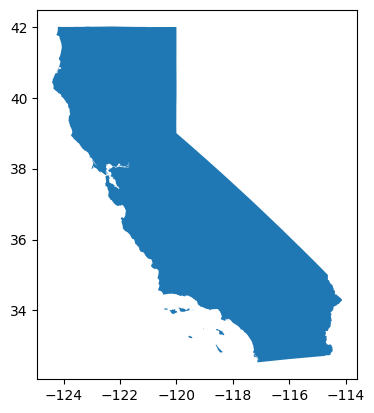

In [6]:
california_gdf.plot()

In [58]:
import geopandas as gpd
from shapely.geometry import Polygon
from math import sqrt

In [9]:
split_california_gdf = california_gdf.explode()

/tmp/ipykernel_31247/3378129362.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  split_california_gdf = california_gdf.explode()


In [44]:
split_california_gdf.head()

GID_1 GID_0       COUNTRY      NAME_1  VARNAME_1 NL_NAME_1 TYPE_1  \
4 0  USA.5_1   USA  UnitedStates  California  CA|Calif.        NA  State   
  1  USA.5_1   USA  UnitedStates  California  CA|Calif.        NA  State   
  2  USA.5_1   USA  UnitedStates  California  CA|Calif.        NA  State   
  3  USA.5_1   USA  UnitedStates  California  CA|Calif.        NA  State   
  4  USA.5_1   USA  UnitedStates  California  CA|Calif.        NA  State   

    ENGTYPE_1 CC_1 HASC_1  ISO_1  \
4 0     State   NA  US.CA  US-CA   
  1     State   NA  US.CA  US-CA   
  2     State   NA  US.CA  US-CA   
  3     State   NA  US.CA  US-CA   
  4     State   NA  US.CA  US-CA   

                                              geometry  
4 0  POLYGON ((-117.23300 32.77420, -117.23360 32.7...  
  1  POLYGON ((-117.21530 32.77670, -117.21940 32.7...  
  2  POLYGON ((-118.43280 32.80310, -118.43140 32.8...  
  3  POLYGON ((-116.21880 32.60920, -117.10050 32.5...  
  4  POLYGON ((-118.58920 33.02940, -118.58690 33.0...

<Axes: >

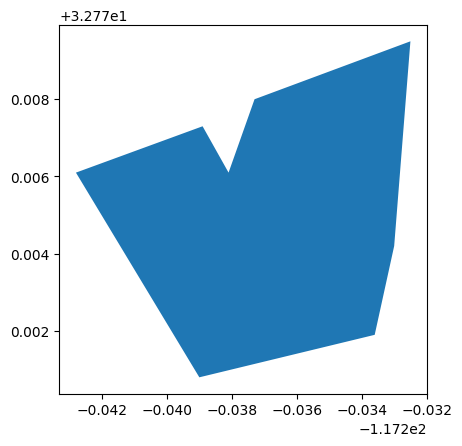

In [48]:
split_california_gdf.iloc[0:1].plot()

In [70]:
target_area = 100000000  # 100 square kilometers in square meters
side_length = 0.01

In [71]:
minx, miny, maxx, maxy = california_gdf.total_bounds

In [75]:
minx,miny,maxx,maxy

(np.float64(-124.4156),
 np.float64(32.5309),
 np.float64(-114.1295),
 np.float64(42.0098))

In [102]:
def decimal_range(start, stop, increment):
    while start < stop: # and not math.isclose(start, stop): Py>3.5
        yield start
        start += increment

In [111]:
decimal_range(1,10,0.1)

<generator object decimal_range at 0x7f4a4f680350>

In [69]:
#km/(cos(latitude)*111.320) = longitude
#km/111.320 = latitude
import math
def km_to_long(km,lat):
    return abs(km/(math.cos(lat)*111.320))
def km_to_lat(km):
    return abs(km/110.574)

In [127]:
squares = []
#side_length_x = 
x=minx
y=miny
km=10

side_length_x = km_to_long(km,y)
side_length_y = km_to_lat(km)

for y in decimal_range(miny,maxy,side_length_y):
    side_length_x = km_to_long(km,y)
    for x in decimal_range(minx,maxx,km_to_long(km,y)):
        square = Polygon([(x, y), (x + side_length_x, y), (x + side_length_x, y + side_length_y), (x, y + side_length)])
        squares.append(square)

In [128]:
squares_gdf = gpd.GeoDataFrame(geometry=squares, crs=california_gdf.crs)
squares_gdf

,geometry
0,"POLYGON ((-124.41560 32.53090, -124.21153 32.5..."
1,"POLYGON ((-124.21153 32.53090, -124.00746 32.5..."
2,"POLYGON ((-124.00746 32.53090, -123.80340 32.5..."
3,"POLYGON ((-123.80340 32.53090, -123.59933 32.5..."
4,"POLYGON ((-123.59933 32.53090, -123.39526 32.5..."
...,...
7682,"POLYGON ((-114.98984 41.93637, -114.79347 41.9..."
7683,"POLYGON ((-114.79347 41.93637, -114.59710 41.9..."
7684,"POLYGON ((-114.59710 41.93637, -114.40073 41.9..."
7685,"POLYGON ((-114.40073 41.93637, -114.20436 41.9..."


In [130]:
result_gdf = squares_gdf.sjoin(california_gdf,how="inner")
result_gdf

,geometry,index_right,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1
35,"POLYGON ((-117.27321 32.53090, -117.06914 32.5...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
36,"POLYGON ((-117.06914 32.53090, -116.86507 32.5...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
37,"POLYGON ((-116.86507 32.53090, -116.66101 32.5...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
38,"POLYGON ((-116.66101 32.53090, -116.45694 32.5...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
39,"POLYGON ((-116.45694 32.53090, -116.25287 32.5...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,"POLYGON ((-120.88094 41.93637, -120.68457 41.9...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
7653,"POLYGON ((-120.68457 41.93637, -120.48820 41.9...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
7654,"POLYGON ((-120.48820 41.93637, -120.29183 41.9...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA
7655,"POLYGON ((-120.29183 41.93637, -120.09546 41.9...",4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA


<Axes: >

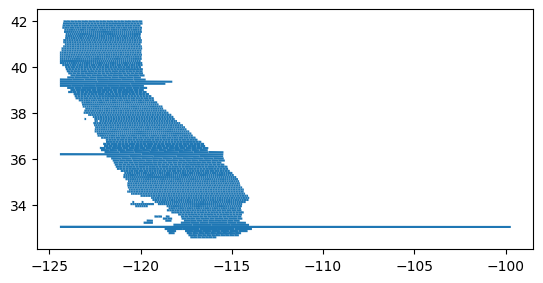

In [131]:
result_gdf.plot()

In [139]:
result_gdf = gpd.overlay(squares_gdf, california_gdf, how="intersection").iloc[1:]

<Axes: >

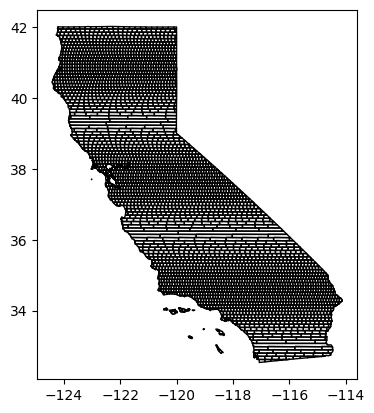

In [140]:
result_gdf.plot(facecolor="none")

In [142]:
result_gdf["geometry"]

1       POLYGON ((-117.06914 32.63090, -116.86507 32.6...
2       POLYGON ((-116.86507 32.63090, -116.66101 32.6...
3       POLYGON ((-116.66101 32.63090, -116.45694 32.6...
4       POLYGON ((-116.45694 32.63090, -116.25287 32.6...
5       POLYGON ((-116.25287 32.63090, -116.06040 32.6...
                              ...                        
3584    POLYGON ((-120.68457 41.93637, -120.88094 41.9...
3585    POLYGON ((-120.48820 41.93637, -120.68457 41.9...
3586    POLYGON ((-120.29183 41.93637, -120.48820 41.9...
3587    POLYGON ((-120.09546 41.93637, -120.29183 41.9...
3588    POLYGON ((-120.09546 41.93637, -120.09546 41.9...
Name: geometry, Length: 3588, dtype: geometry

In [67]:
result_gdf["geometry"]

,minx,miny,maxx,maxy
4,-124.4156,32.5309,-114.1295,42.0098


### Using the Function to Add Grids to the Map

In [143]:
from illuminating.data_preparation.geodata_processing import create_grids

<Axes: >

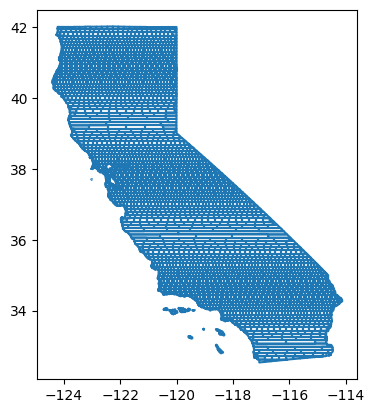

In [145]:
result_gdf = create_grids(california_gdf,10)
result_gdf.boundary.plot()

In [154]:
result_gdf.reset_index(inplace=True)

In [155]:
result_gdf.columns = ["grid_id","geometry"]
result_gdf

,grid_id,geometry
0,1,"POLYGON ((-117.06914 32.62134, -116.86507 32.6..."
1,2,"POLYGON ((-116.86507 32.62134, -116.66101 32.6..."
2,3,"POLYGON ((-116.66101 32.62134, -116.45694 32.6..."
3,4,"POLYGON ((-116.45694 32.62134, -116.25287 32.6..."
4,5,"POLYGON ((-116.25287 32.62134, -116.06719 32.6..."
...,...,...
3581,3582,"POLYGON ((-120.68457 41.93637, -120.88094 41.9..."
3582,3583,"POLYGON ((-120.48820 41.93637, -120.68457 41.9..."
3583,3584,"POLYGON ((-120.29183 41.93637, -120.48820 41.9..."
3584,3585,"POLYGON ((-120.09546 41.93637, -120.29183 41.9..."


In [218]:
result_gdf.to_file("california_squared.geojson", driver='GeoJSON')


TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x7f4a94aab2e0>' as a data type

### Combine with the Population Data

In [146]:
pop_gdf = gpd.read_file("california_pop.geojson")
pop_gdf

,X,Y,Z,id,index_right,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,-123.205416,42.003750,0.000000,8193207,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-123.20542 42.00375)
1,-123.197083,42.003750,0.000000,8193208,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-123.19708 42.00375)
2,-123.188749,42.003750,0.000000,8193209,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-123.18875 42.00375)
3,-123.180416,42.003750,0.000000,8193210,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-123.18042 42.00375)
4,-123.172083,42.003750,0.000000,8193211,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-123.17208 42.00375)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595736,-117.097083,32.545417,0.044895,14442149,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-117.09708 32.54542)
595737,-117.088750,32.545417,20.881916,14442150,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-117.08875 32.54542)
595738,-117.080416,32.545417,7.611944,14442151,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-117.08042 32.54542)
595739,-117.072083,32.545417,0.446232,14442152,4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,POINT (-117.07208 32.54542)


In [150]:
pop_gdf = pop_gdf[["Z","geometry"]]

In [1]:
pop_gdf.columns = ["lon","lat","population","geometry"]
pop_gdf

NameError: name 'pop_gdf' is not defined

In [195]:
pop_gdf.describe()

,population
count,595741.000000
mean,68.393535
std,405.687154
min,0.000000
25%,0.000000
50%,0.003398
75%,0.764128
max,29433.517578


In [156]:
pop_gdf_joinned = pop_gdf.sjoin(result_gdf,how="inner")
pop_gdf_joinned

,population,geometry,index_right,grid_id
0,0.000000,POINT (-123.20542 42.00375),3569,3570
1,0.000000,POINT (-123.19708 42.00375),3569,3570
2,0.000000,POINT (-123.18875 42.00375),3569,3570
3,0.000000,POINT (-123.18042 42.00375),3569,3570
4,0.000000,POINT (-123.17208 42.00375),3569,3570
...,...,...,...,...
595729,0.778955,POINT (-116.99708 32.55375),0,1
595730,9.114757,POINT (-116.98875 32.55375),0,1
595731,12.215566,POINT (-116.98042 32.55375),0,1
595732,4.995272,POINT (-116.97208 32.55375),0,1


In [196]:
pop_gdf_agg=pop_gdf_joinned.dissolve(by='grid_id',aggfunc='sum').reset_index()
pop_gdf_agg

,grid_id,geometry,population,index_right
0,1,"MULTIPOINT (-117.06375 32.54542, -117.06375 32...",150641.969899,0
1,2,"MULTIPOINT (-116.86375 32.57042, -116.86375 32...",819.847329,161
2,3,"MULTIPOINT (-116.65542 32.58708, -116.65542 32...",1791.349191,212
3,4,"MULTIPOINT (-116.45542 32.60375, -116.45542 32...",342.677902,183
4,5,"MULTIPOINT (-116.24708 32.62042, -116.23875 32...",559.318402,48
...,...,...,...,...
3560,3582,"MULTIPOINT (-120.88042 41.93708, -120.88042 41...",0.000000,601608
3561,3583,"MULTIPOINT (-120.68042 41.93708, -120.68042 41...",2.925910,573120
3562,3584,"MULTIPOINT (-120.35542 41.93708, -120.34708 41...",87.769150,139737
3563,3585,"MULTIPOINT (-120.28875 41.93708, -120.28875 41...",15.905017,602112


In [197]:
result_gdf.columns = ["res_id","square_geometry"]

In [200]:
result_gdf

,res_id,square_geometry
0,1,"POLYGON ((-117.06914 32.62134, -116.86507 32.6..."
1,2,"POLYGON ((-116.86507 32.62134, -116.66101 32.6..."
2,3,"POLYGON ((-116.66101 32.62134, -116.45694 32.6..."
3,4,"POLYGON ((-116.45694 32.62134, -116.25287 32.6..."
4,5,"POLYGON ((-116.25287 32.62134, -116.06719 32.6..."
...,...,...
3581,3582,"POLYGON ((-120.68457 41.93637, -120.88094 41.9..."
3582,3583,"POLYGON ((-120.48820 41.93637, -120.68457 41.9..."
3583,3584,"POLYGON ((-120.29183 41.93637, -120.48820 41.9..."
3584,3585,"POLYGON ((-120.09546 41.93637, -120.29183 41.9..."


In [201]:
pop_gdf_clean = pop_gdf_agg.join(result_gdf,how="inner",lsuffix = "grid_id",rsuffix="res_id")

In [202]:
pop_gdf_clean

,grid_id,geometry,population,index_right,res_id,square_geometry
0,1,"MULTIPOINT (-117.06375 32.54542, -117.06375 32...",150641.969899,0,1,"POLYGON ((-117.06914 32.62134, -116.86507 32.6..."
1,2,"MULTIPOINT (-116.86375 32.57042, -116.86375 32...",819.847329,161,2,"POLYGON ((-116.86507 32.62134, -116.66101 32.6..."
2,3,"MULTIPOINT (-116.65542 32.58708, -116.65542 32...",1791.349191,212,3,"POLYGON ((-116.66101 32.62134, -116.45694 32.6..."
3,4,"MULTIPOINT (-116.45542 32.60375, -116.45542 32...",342.677902,183,4,"POLYGON ((-116.45694 32.62134, -116.25287 32.6..."
4,5,"MULTIPOINT (-116.24708 32.62042, -116.23875 32...",559.318402,48,5,"POLYGON ((-116.25287 32.62134, -116.06719 32.6..."
...,...,...,...,...,...,...
3560,3582,"MULTIPOINT (-120.88042 41.93708, -120.88042 41...",0.000000,601608,3561,"POLYGON ((-120.56018 41.93637, -120.39255 41.9..."
3561,3583,"MULTIPOINT (-120.68042 41.93708, -120.68042 41...",2.925910,573120,3562,"POLYGON ((-120.39255 41.93637, -120.22492 41.9..."
3562,3584,"MULTIPOINT (-120.35542 41.93708, -120.34708 41...",87.769150,139737,3563,"POLYGON ((-120.22492 41.93637, -120.05730 41.9..."
3563,3585,"MULTIPOINT (-120.28875 41.93708, -120.28875 41...",15.905017,602112,3564,"POLYGON ((-120.05730 41.84593, -120.05730 41.9..."


In [203]:
pop_gdf_clean.drop(columns = ["grid_id","geometry","index_right","res_id"],inplace=True)	

In [204]:
pop_gdf_clean.columns = ["population","geometry"]

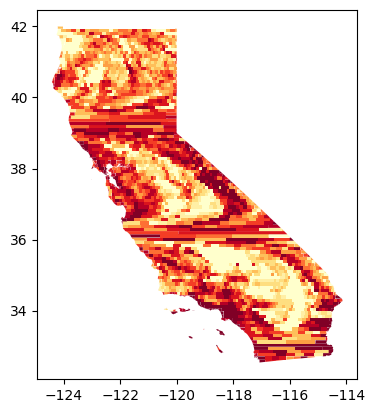

In [213]:
pop_gdf_clean.plot(column = 'population', cmap='YlOrRd',scheme="Quantiles", k=10);

In [221]:
pop_gdf_clean["population"].sum()

np.float64(40643719.72561653)

### Combine with Power Plant Location

In [225]:
import sqlite3
def get_uspvdb(state:str="CA"):
    # Load the CSV file into a Pandas DataFrame
    csv_file_path = 'uspvdb_v2_0_20240801.csv'
    df = pd.read_csv(csv_file_path)
    # Create an in-memory SQLite database
    conn = sqlite3.connect(':memory:')
    # Write the DataFrame to the SQLite database
    df.to_sql('power_plants', conn, index=False, if_exists='replace')
    # Query
    query = f"SELECT ylat, xlong, p_area,p_year,p_cap_dc FROM power_plants WHERE p_state = '{state}'"
    result_df = pd.read_sql_query(query, conn)
    return result_df

In [226]:
power_plant_df = get_uspvdb()
power_plant_df

,ylat,xlong,p_area,p_year,p_cap_dc
0,36.177598,-120.109391,373343,2012,26.8
1,33.265240,-116.327979,162688,2014,8.9
2,34.707428,-118.304671,606208,2013,25.6
3,34.708588,-118.274109,42700,2013,2.0
4,36.175836,-120.115552,383759,2013,27.7
...,...,...,...,...,...
535,32.690795,-115.644149,5104085,2014,252.9
536,32.658612,-115.668611,2741905,2013,172.2
537,32.690980,-115.667807,2713736,2022,137.7
538,38.500651,-121.692985,37452,2013,2.5


In [230]:
power_plant_gdf = gpd.GeoDataFrame(power_plant_df, 
                                   geometry=gpd.points_from_xy(power_plant_df.xlong, power_plant_df.ylat), crs=california_gdf.crs)
power_plant_gdf.drop(columns=["ylat","xlong"],inplace=True)

In [233]:
power_plant_gdf.rename(columns={"geometry": "pp_geometry"},inplace=True)

In [239]:
power_plant_gdf= power_plant_gdf.set_geometry("pp_geometry")

In [250]:
pp_pop_gdf = pop_gdf_clean.sjoin(power_plant_gdf,how="left",lsuffix="geometry",rsuffix="pp_geometry")
pp_pop_gdf

,population,geometry,index_pp_geometry,p_area,p_year,p_cap_dc
0,150641.969899,"POLYGON ((-117.06914 32.62134, -116.86507 32.6...",NaN,NaN,NaN,NaN
1,819.847329,"POLYGON ((-116.86507 32.62134, -116.66101 32.6...",NaN,NaN,NaN,NaN
2,1791.349191,"POLYGON ((-116.66101 32.62134, -116.45694 32.6...",NaN,NaN,NaN,NaN
3,342.677902,"POLYGON ((-116.45694 32.62134, -116.25287 32.6...",NaN,NaN,NaN,NaN
4,559.318402,"POLYGON ((-116.25287 32.62134, -116.06719 32.6...",307.0,311698.0,2017.0,28.2
...,...,...,...,...,...,...
3560,0.000000,"POLYGON ((-120.56018 41.93637, -120.39255 41.9...",NaN,NaN,NaN,NaN
3561,2.925910,"POLYGON ((-120.39255 41.93637, -120.22492 41.9...",NaN,NaN,NaN,NaN
3562,87.769150,"POLYGON ((-120.22492 41.93637, -120.05730 41.9...",NaN,NaN,NaN,NaN
3563,15.905017,"POLYGON ((-120.05730 41.84593, -120.05730 41.9...",NaN,NaN,NaN,NaN


In [251]:
pp_pop_gdf.drop(columns=["index_pp_geometry","p_area","p_year"],inplace=True)

In [252]:
pp_pop_gdf

,population,geometry,p_cap_dc
0,150641.969899,"POLYGON ((-117.06914 32.62134, -116.86507 32.6...",NaN
1,819.847329,"POLYGON ((-116.86507 32.62134, -116.66101 32.6...",NaN
2,1791.349191,"POLYGON ((-116.66101 32.62134, -116.45694 32.6...",NaN
3,342.677902,"POLYGON ((-116.45694 32.62134, -116.25287 32.6...",NaN
4,559.318402,"POLYGON ((-116.25287 32.62134, -116.06719 32.6...",28.2
...,...,...,...
3560,0.000000,"POLYGON ((-120.56018 41.93637, -120.39255 41.9...",NaN
3561,2.925910,"POLYGON ((-120.39255 41.93637, -120.22492 41.9...",NaN
3562,87.769150,"POLYGON ((-120.22492 41.93637, -120.05730 41.9...",NaN
3563,15.905017,"POLYGON ((-120.05730 41.84593, -120.05730 41.9...",NaN


In [256]:
pp_pop_gdf = pp_pop_gdf[pp_pop_gdf["geometry"].geom_type!="MultiPolygon"]

In [259]:
pp_pop_gdf_clean = pp_pop_gdf.fillna(0)

In [260]:
pp_pop_gdf_clean

,population,geometry,p_cap_dc
0,150641.969899,"POLYGON ((-117.06914 32.62134, -116.86507 32.6...",0.0
1,819.847329,"POLYGON ((-116.86507 32.62134, -116.66101 32.6...",0.0
2,1791.349191,"POLYGON ((-116.66101 32.62134, -116.45694 32.6...",0.0
3,342.677902,"POLYGON ((-116.45694 32.62134, -116.25287 32.6...",0.0
4,559.318402,"POLYGON ((-116.25287 32.62134, -116.06719 32.6...",28.2
...,...,...,...
3559,0.000000,"POLYGON ((-120.72781 41.93637, -120.56018 41.9...",0.0
3560,0.000000,"POLYGON ((-120.56018 41.93637, -120.39255 41.9...",0.0
3561,2.925910,"POLYGON ((-120.39255 41.93637, -120.22492 41.9...",0.0
3562,87.769150,"POLYGON ((-120.22492 41.93637, -120.05730 41.9...",0.0


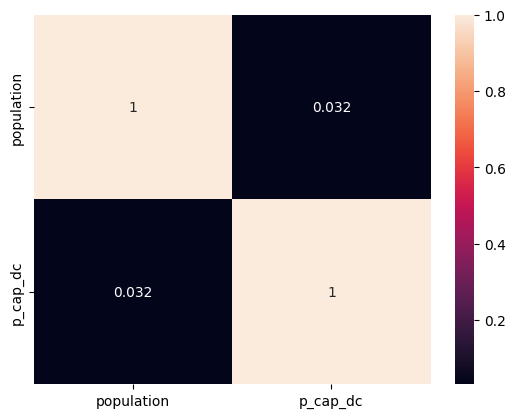

In [261]:
import seaborn as sns
ax = sns.heatmap(pp_pop_gdf_clean[["population","p_cap_dc"]].corr(), annot=True)

In [265]:
pp_pop_gdf_clean[pp_pop_gdf_clean["p_cap_dc"]==pp_pop_gdf_clean["p_cap_dc"].max()]

,population,geometry,p_cap_dc
1175,4312.386281,"POLYGON ((-120.13233 35.42489, -120.00635 35.4...",752.1


In [ ]:
pp_pop_gdf_clean["p_cap_dc"]>0

### Combining With the Power Plant location, with Power Plant Location as reference

In [266]:
power_plant_df = get_uspvdb()
power_plant_df

,ylat,xlong,p_area,p_year,p_cap_dc
0,36.177598,-120.109391,373343,2012,26.8
1,33.265240,-116.327979,162688,2014,8.9
2,34.707428,-118.304671,606208,2013,25.6
3,34.708588,-118.274109,42700,2013,2.0
4,36.175836,-120.115552,383759,2013,27.7
...,...,...,...,...,...
535,32.690795,-115.644149,5104085,2014,252.9
536,32.658612,-115.668611,2741905,2013,172.2
537,32.690980,-115.667807,2713736,2022,137.7
538,38.500651,-121.692985,37452,2013,2.5


In [275]:
power_plant_gdf = gpd.GeoDataFrame(power_plant_df, 
                                   geometry=gpd.points_from_xy(power_plant_df.xlong, power_plant_df.ylat), crs=california_gdf.crs)
power_plant_gdf

,ylat,xlong,p_area,p_year,p_cap_dc,geometry
0,36.177598,-120.109391,373343,2012,26.8,POINT (-120.10939 36.17760)
1,33.265240,-116.327979,162688,2014,8.9,POINT (-116.32798 33.26524)
2,34.707428,-118.304671,606208,2013,25.6,POINT (-118.30467 34.70743)
3,34.708588,-118.274109,42700,2013,2.0,POINT (-118.27411 34.70859)
4,36.175836,-120.115552,383759,2013,27.7,POINT (-120.11555 36.17584)
...,...,...,...,...,...,...
535,32.690795,-115.644149,5104085,2014,252.9,POINT (-115.64415 32.69080)
536,32.658612,-115.668611,2741905,2013,172.2,POINT (-115.66861 32.65861)
537,32.690980,-115.667807,2713736,2022,137.7,POINT (-115.66781 32.69098)
538,38.500651,-121.692985,37452,2013,2.5,POINT (-121.69298 38.50065)


In [276]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np


In [331]:
def create_grid(gdf, cell_size_km):
    # Convert cell size to degrees (assuming a roughly spherical Earth)
    cell_size_deg = cell_size_km / 111  # 1 degree ~ 111 km
    
    # Get the bounds of the GeoDataFrame
 
    grid_cells = []
    x=gdf.x
    y=gdf.y
    grid_cells = box(x, y, x + cell_size_deg, y + cell_size_deg)
    
    # Create a GeoDataFrame from the grid cells
    grid = grid_cells
    
    return grid

In [339]:
def create_circle(gdf, cell_size_km):
    # Convert cell size to degrees (assuming a roughly spherical Earth)
    radius = cell_size_km / 111  # 1 degree ~ 111 km
    
    # Get the bounds of the GeoDataFrame
 

    circle = gdf.buffer(radius)
    
    return circle

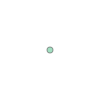

In [318]:
point = power_plant_gdf.iloc[0]["geometry"]
point

In [338]:
grid_ed_power_plant = gpd.GeoDataFrame(power_plant_gdf["geometry"].apply(create_grid,args=[10]))

In [336]:
grid_ed_power_plant

,geometry
0,"POLYGON ((-119.20849 36.17760, -119.20849 37.0..."
1,"POLYGON ((-115.42708 33.26524, -115.42708 34.1..."
2,"POLYGON ((-117.40377 34.70743, -117.40377 35.6..."
3,"POLYGON ((-117.37321 34.70859, -117.37321 35.6..."
4,"POLYGON ((-119.21465 36.17584, -119.21465 37.0..."
...,...
535,"POLYGON ((-114.74325 32.69080, -114.74325 33.5..."
536,"POLYGON ((-114.76771 32.65861, -114.76771 33.5..."
537,"POLYGON ((-114.76691 32.69098, -114.76691 33.5..."
538,"POLYGON ((-120.79208 38.50065, -120.79208 39.4..."


In [340]:
circled_power_plant =  gpd.GeoDataFrame(power_plant_gdf["geometry"].apply(create_circle,args=[10]))

In [341]:
circled_power_plant

,geometry
0,"POLYGON ((-120.01930 36.17760, -120.01973 36.1..."
1,"POLYGON ((-116.23789 33.26524, -116.23832 33.2..."
2,"POLYGON ((-118.21458 34.70743, -118.21501 34.6..."
3,"POLYGON ((-118.18402 34.70859, -118.18445 34.6..."
4,"POLYGON ((-120.02546 36.17584, -120.02590 36.1..."
...,...
535,"POLYGON ((-115.55406 32.69080, -115.55449 32.6..."
536,"POLYGON ((-115.57852 32.65861, -115.57895 32.6..."
537,"POLYGON ((-115.57772 32.69098, -115.57815 32.6..."
538,"POLYGON ((-121.60289 38.50065, -121.60333 38.4..."


#### Trying sjoin and overlay

In [288]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plot
import numpy as np

In [286]:
# Load the shapefile of California
california_gdf


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
4,USA.5_1,USA,UnitedStates,California,CA|Calif.,NA,State,State,NA,US.CA,US-CA,"MULTIPOLYGON (((-117.23300 32.77420, -117.2336..."


In [294]:
grid_ed_power_plant

,geometry
0,"POLYGON ((-124.01431 32.61833, -124.01431 32.7..."
1,"POLYGON ((-124.01431 32.70842, -124.01431 32.7..."
2,"POLYGON ((-124.01431 32.79851, -124.01431 32.8..."
3,"POLYGON ((-124.01431 32.88860, -124.01431 32.9..."
4,"POLYGON ((-124.01431 32.97869, -124.01431 33.0..."
...,...
9959,"POLYGON ((-114.55486 40.63635, -114.55486 40.7..."
9960,"POLYGON ((-114.55486 40.72644, -114.55486 40.8..."
9961,"POLYGON ((-114.55486 40.81653, -114.55486 40.9..."
9962,"POLYGON ((-114.55486 40.90662, -114.55486 40.9..."


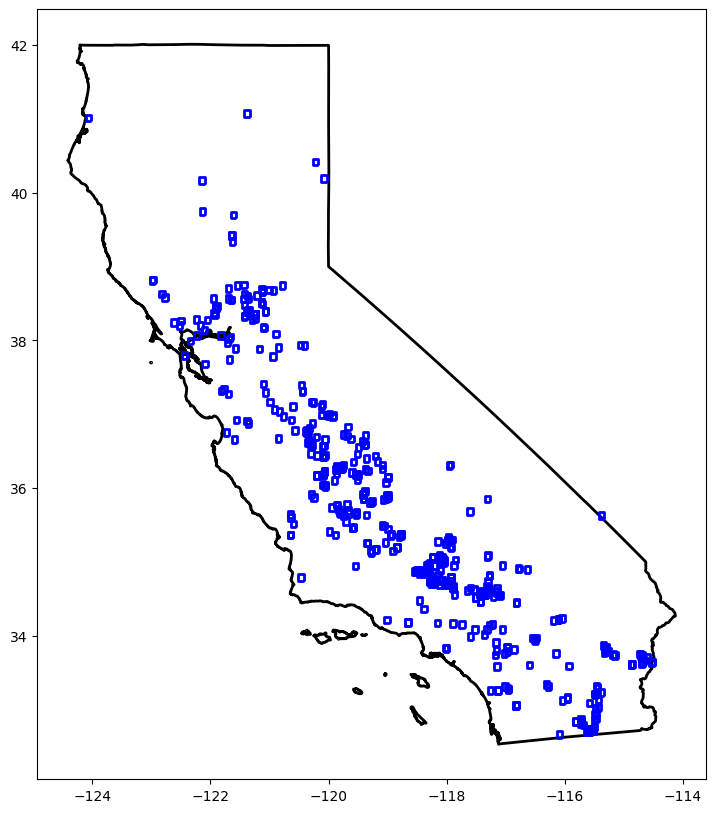

In [342]:
fig, ax = plot.subplots(figsize=(10, 10))
california_gdf.boundary.plot(ax=ax, color='black', linewidth=2)
grid_ed_power_plant.boundary.plot(ax=ax, color='blue', linewidth=2)
plot.show();

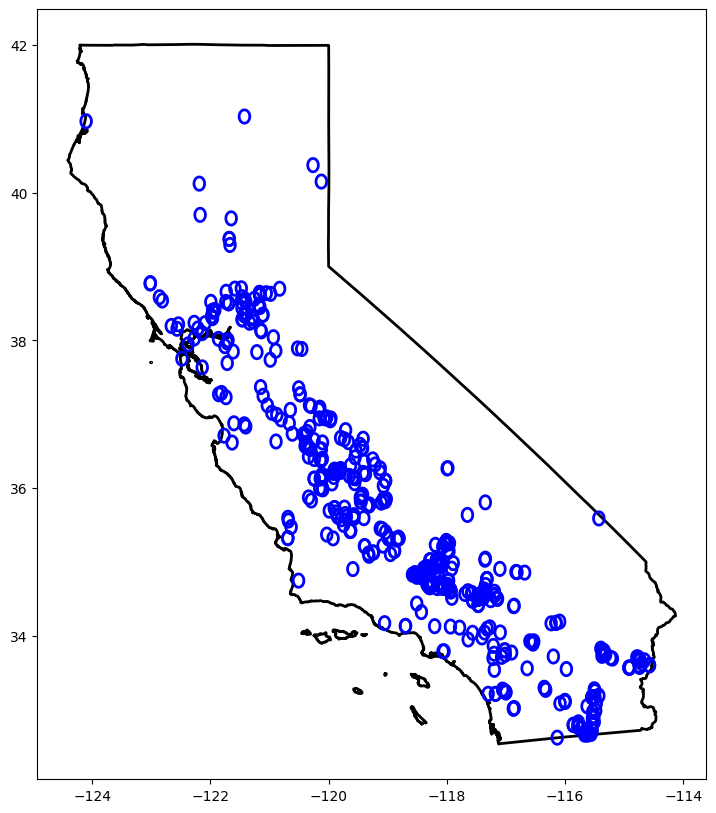

In [343]:
fig, ax = plot.subplots(figsize=(10, 10))
california_gdf.boundary.plot(ax=ax, color='black', linewidth=2)
circled_power_plant.boundary.plot(ax=ax, color='blue', linewidth=2)
plot.show();